In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
from utils import EstimatorSelectionHelper
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
plt.rc("font", size=14)
from sklearn.metrics import roc_curve

data = pd.read_csv("dataset.csv", header=0)
data.head()


y = data['ReachedCompositeEndpoint']
X = data[['Sex', 'MontrealLocationDiagnosis', 'HBI', 'TimeFromLastUpdateMontrealMonths', 'MaxMontrealBehaviour', 'Plt', 'AbdominalPainId', 'LiquidStoolsPerDay', 'MouthUlcers', 'qryAverageCalprosBeforeCompositeEndpoint.CountOfNumericalCalpro', 'qryAverageCalprosBeforeCompositeEndpoint.MinOfNumericalCalpro', 'qryAverageCalprosBeforeCompositeEndpoint.AvgOfNumericalCalpro', 'qryAverageCalprosBeforeCompositeEndpoint.AvgOfLogCalprotectin', 'qryAverageCalprosBeforeCompositeEndpoint.MaxOfNumericalCalpro', 'qryAverageCalprosBeforeMontrealIncrease.CountOfNumericalCalpro',
          'qryAverageCalprosBeforeMontrealIncrease.MaxOfNumericalCalpro', 'qryAverageCalprosBeforeMontrealIncrease.AvgOfNumericalCalpro']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)


models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(random_state=0),
    'MLPClassifier': MLPClassifier(max_iter=300, random_state=0),
     

}
old_models = {
    #'MLPClassifier': MLPClassifier(max_iter=300, random_state=0),
    "SVC": SVC(random_state=0)

}


params = {
    'LogisticRegression': {'penalty': ['l1', 'l2'],
                           'C': np.logspace(-4, 4, 20)},
    'RandomForestClassifier': {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], "max_depth": [1,3,5,10,13,14,16,50,100, 200, 300], "min_samples_split": [1.0,2,3,4]},
    "MLPClassifier": {
        'hidden_layer_sizes': [(100,), (100, 75, 50), (100, 50, 4), (100, 50, 25)],
        'activation': ['logistic'],
        'solver': ['adam'],
        'alpha': [0.00001, 0.001, 0.01, 0.05, 0.1, 0.5],
        'learning_rate': ['constant', 'adaptive'],

    },
    'SVC': {'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': [
         "linear"]},
    'GaussianNB': {'var_smoothing': [0.1,0.5,1,2,3,0.00001]},
    'KNN': {'leaf_size' : list(range(1,50)),
'n_neighbors' : list(range(1,30)),
'p' : [1,2]}
}


In [10]:
helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train, y_train, n_jobs=2, scoring='accuracy', refit="True")
means = helper.score_summary(sort_by='mean_score')
maxs = helper.score_summary(sort_by='max_score').iloc[1:20]




Running GridSearchCV for LogisticRegression.
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 301 tasks      | elapsed:   20.8s
[Parallel(n_jobs=2)]: Done 397 out of 400 | elapsed:   25.4s remaining:    0.2s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:   25.4s finished
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 10 folds for each of 330 candidates, totalling 3300 fits


ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

In [5]:
for k in helper.grid_searches:
    best_estimator = helper.grid_searches[k].best_estimator_
    print(best_estimator)
    test_roc = roc_auc_score(y_test, best_estimator.predict(X_test))
    test_acc = accuracy_score(y_test, best_estimator.predict(X_test))
    print(k)
    print(test_roc)
    print(test_acc)

LogisticRegression(C=4.281332398719396, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
LogisticRegression
0.8285232383808097
0.9008264462809917
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
RandomForestClassifier
0.7972263868065967
0.8801652892561983
MLPClassifier(activation='logistic', alpha=0.5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 75, 50), learning_rate='c

In [6]:
means

,estimator,min_score,mean_score,max_score,std_score,C,activation,alpha,gamma,hidden_layer_sizes,kernel,learning_rate,n_estimators,penalty,solver
23,LogisticRegression,0.807018,0.88476,0.964286,0.0414279,4.28133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l2,NaN
30,LogisticRegression,0.807018,0.884697,0.946429,0.0391778,206.914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,NaN
32,LogisticRegression,0.807018,0.884697,0.946429,0.0391778,545.559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,NaN
38,LogisticRegression,0.807018,0.884697,0.946429,0.0391778,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,NaN
24,LogisticRegression,0.807018,0.884697,0.946429,0.0391778,11.2884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,NaN
36,LogisticRegression,0.807018,0.884697,0.946429,0.0391778,3792.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,NaN
26,LogisticRegression,0.807018,0.884697,0.946429,0.0391778,29.7635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,NaN
34,LogisticRegression,0.807018,0.884697,0.946429,0.0391778,1438.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,NaN
28,LogisticRegression,0.807018,0.884697,0.946429,0.0391778,78.476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,NaN
27,LogisticRegression,0.807018,0.882943,0.946429,0.0390816,29.7635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l2,NaN


LogisticRegression(C=4.281332398719396, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
MLPClassifier(activation='logistic', alpha=0.5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 75, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=

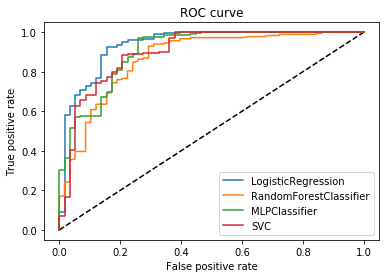

In [7]:
from sklearn.metrics import roc_curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for k in helper.grid_searches:
    best_estimator = helper.grid_searches[k].best_estimator_
    print(best_estimator)
    fpr, tpr, tres  = roc_curve(y_test, best_estimator.predict_proba(X_test)[:,1], pos_label=0)
    plt.plot(fpr,tpr, label=k)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
   


In [ ]:
helper.grid_searches["MLPClassifier"].predict_proba(X_test)